# Distribusi Chi-Square VS Distribusi Normal

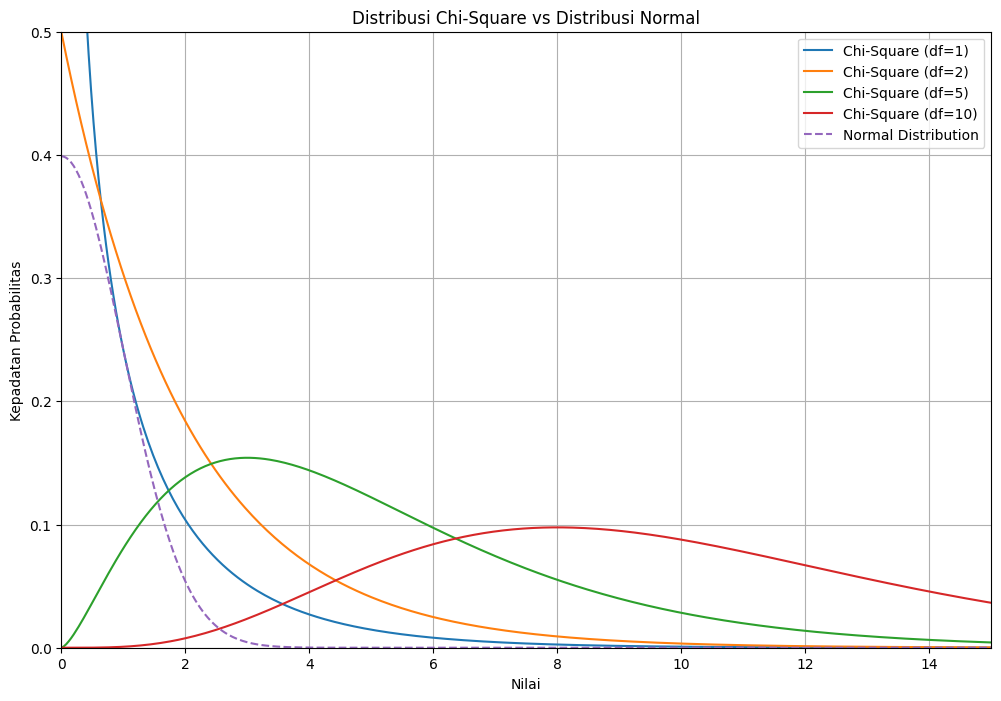

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed()

# Derajat kebebasan
df_values = [1, 2, 5, 10]

# Rentang nilai x untuk distribusi
x = np.linspace(0, 40, 1000) # Menghasilkan 1000 nilai secara merata antara 0 dan 40

# Plot distribusi chi-square dan distribusi normal
plt.figure(figsize=(12, 8))

for df in df_values:
    # Hitung distribusi chi-square
    chi_square_pdf = stats.chi2.pdf(x, df)

    # Plot distribusi chi-square
    plt.plot(x, chi_square_pdf, label=f'Chi-Square (df={df})')

# Plot distribusi normal
normal_pdf = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, normal_pdf, label='Normal Distribution', linestyle='--')

# Pengaturan grafik
plt.title('Distribusi Chi-Square vs Distribusi Normal')
plt.xlabel('Nilai')
plt.ylabel('Kepadatan Probabilitas')
plt.legend()
plt.grid()
plt.xlim(0, 15)
plt.ylim(0, 0.5)

plt.show()

[link text](https://)

# Uji Kecocokan Model (Goodness of Fit)

Hipotesis Nol (H0): Data hasil pelemparan dadu berdistribusi uniform
Hipotesis Alternatif (H1): Data hasil pelemparan dadu tidak berdistribusi uniform
Statistik Chi-Square: 1.7000000000000002, p-value: 0.8888997594927638
Derajat Kebebasan: 5
Nilai Kritis (alpha=0.05): 11.07

Kesimpulan: Gagal menolak H0. Data hasil pelemparan dadu berdistribusi uniform.

Perbedaan tidak cukup signifikan untuk menolak H0


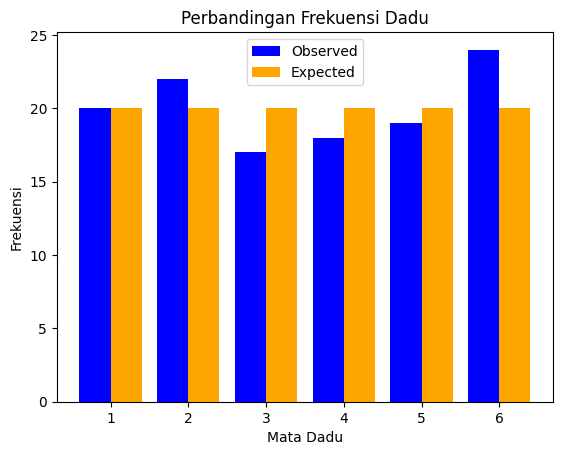

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2

# Menghasilkan data acak untuk hasil pelemparan dadu
observed = [20, 22, 17, 18, 19, 24]  # Frekuensi yang diamati
expected = [20] * 6  # Frekuensi yang diharapkan untuk dadu seimbang

# Hipotesis
H0 = "Data hasil pelemparan dadu berdistribusi uniform"
H1 = "Data hasil pelemparan dadu tidak berdistribusi uniform"

print(f"Hipotesis Nol (H0): {H0}")
print(f"Hipotesis Alternatif (H1): {H1}")

# Tingkat signifikansi
alpha = 0.05

# Derajat kebebasan
df = len(expected) - 1  # Derajat kebebasan

# Uji Chi-Square
chi2_stat, p_value = chisquare(observed, expected)

# Hasil Uji
print(f'Statistik Chi-Square: {chi2_stat}, p-value: {p_value}')
print(f'Derajat Kebebasan: {df}')

# Menghitung nilai kritis
critical_value = chi2.ppf(1 - alpha, df)  # Nilai kritis
print(f'Nilai Kritis (alpha={alpha}): {critical_value:.2f}')

print()

# Kesimpulan
if p_value < alpha:
    print("Kesimpulan: Tolak H0. Data hasil pelemparan dadu tidak berdistribusi uniform.")
else:
    print("Kesimpulan: Gagal menolak H0. Data hasil pelemparan dadu berdistribusi uniform.")

print()

print("Perbedaan tidak cukup signifikan untuk menolak H0")
# Visualisasi
sides = ['1', '2', '3', '4', '5', '6']
x = np.arange(len(sides))

plt.bar(x - 0.2, observed, width=0.4, label='Observed', color='blue')
plt.bar(x + 0.2, expected, width=0.4, label='Expected', color='orange')
plt.xticks(x, sides)
plt.xlabel('Mata Dadu')
plt.ylabel('Frekuensi')
plt.title('Perbandingan Frekuensi Dadu')
plt.legend()

plt.show()

## Contoh Uji Kecocokan Model (Hasil Tolak H0)
**Kasus**: Hubungan Antara Lokasi Pertandingan dan Hasil Pertandingan

Sebuah studi ingin menguji apakah ada hubungan antara lokasi pertandingan (kandang atau tandang) dan hasil pertandingan (menang, seri, kalah). Mereka mengumpulkan data dari 100 pertandingan liga sepak bola lokal dengan hasil sebagai berikut:

* Kandang (Home):
  * Menang: 40 pertandingan
  * Seri: 10 pertandingan
  * Kalah: 5 pertandingan
* Tandang (Away):
  * Menang: 20 pertandingan
  * Seri: 15 pertandingan
  * Kalah: 10 pertandingan

Hipotesis:
* H0 (Hipotesis nol): Tidak ada hubungan antara lokasi pertandingan dan hasil pertandingan (lokasi tidak mempengaruhi hasil).
* H1 (Hipotesis alternatif): Ada hubungan antara lokasi pertandingan dan hasil pertandingan (lokasi mempengaruhi hasil).

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy import stats

# Membuat data kontingensi berdasarkan kasus
data_pertandingan = np.array([[40, 20],   # Menang
                              [10, 15],   # Seri
                              [5, 10]])   # Kalah

df_observed = pd.DataFrame(data_pertandingan, columns=['Kandang', 'Tandang'], index=['Menang', 'Seri', 'Kalah'])
print("Tabel Kontingensi Observasi:")
print(df_observed)

# Melakukan Uji Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(data_pertandingan)

df_expected = pd.DataFrame(np.round(expected).astype(int), columns=['Kandang', 'Tandang'], index=['Menang', 'Seri', 'Kalah'])
print("\nTabel Nilai Ekspektasi (Expected values):")
print(df_expected)

df_combined = df_observed.astype(str) + " (" + df_expected.astype(str) + ")"
print("\nTabel Observasi dan Nilai Ekspektasi:")
print(df_combined)

print("\nStatistik Uji:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
# Critical Value
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, dof)
print(f"Critical value: {critical_value}")
print("--")

# Kesimpulan
if chi2_stat > critical_value:
    print("Keputusan: Tolak H0, ada hubungan antara lokasi pertandingan dan hasil pertandingan.")
else:
    print("Keputusan: Gagal menolak H0,tidak ada hubungan antara lokasi pertandingan dan hasil pertandingan.")

Tabel Kontingensi Observasi:
        Kandang  Tandang
Menang       40       20
Seri         10       15
Kalah         5       10

Tabel Nilai Ekspektasi (Expected values):
        Kandang  Tandang
Menang       33       27
Seri         14       11
Kalah         8        7

Tabel Observasi dan Nilai Ekspektasi:
        Kandang  Tandang
Menang  40 (33)  20 (27)
Seri    10 (14)  15 (11)
Kalah     5 (8)   10 (7)

Statistik Uji:
Chi-Square Statistic: 8.417508417508419
P-value: 0.014864875339330707
Degrees of Freedom: 2
Critical value: 5.991464547107979
--
Keputusan: Tolak H0, ada hubungan antara lokasi pertandingan dan hasil pertandingan.


# Uji Independensi (Test for Independence)
**CASE** : Ingin mengetahui **apakah pendapat penduduk di suatu daerah tentang reformasi pajak baru tidak bergantung pada tingkat pendapatan mereka**. Sampel acak terdiri dari 1000 pemilih terdaftar dari negara bagian Illinois diklasifikasikan apakah mereka termasuk dalam kelompok berpenghasilan **rendah, menengah, atau tinggi** dan apakah mereka **mendukung reformasi pajak atau tidak**. Frekuensi yang diamati disajikan pada Tabel dibawah.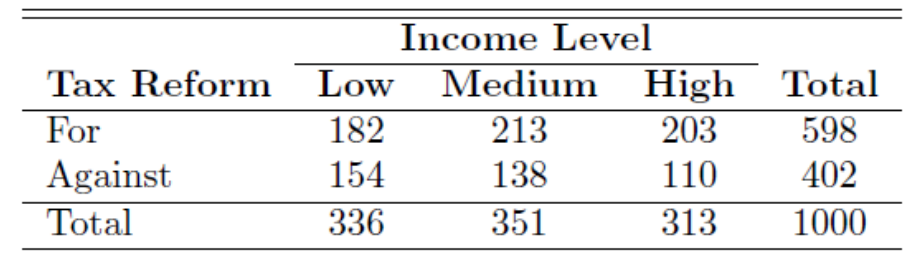


**Tujuan**: Ingin mengetahui apakah Pendapat mengenai Tax Reform dipengaruhi oleh tingkat penghasilan
1. * Ho : Pendapat mengenai Tax Reform dan tingkat penghasilan tidak saling mempengaruhi
  * H1 : Pendapat mengenai Tax Reform dan tingkat penghasilan saling mempengaruhi.
2. alpha = 0.05
3. Statistik uji:

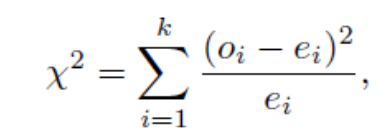

Tabel Kontingensi Observasi:
         Low  Medium  High
For      182     213   203
Against  154     138   110
--
Tabel Nilai Ekspektasi (Expected values):
             Low   Medium     High
For      200.928  209.898  187.174
Against  135.072  141.102  125.826
--
Tabel Observed dan Expected Values:
                 Low       Medium         High
For      182 (200.9)  213 (209.9)  203 (187.2)
Against  154 (135.1)  138 (141.1)  110 (125.8)
--
Chi-Square Statistic: 7.878211595034106
P-value: 0.019465613164995288
Degrees of Freedom: 2
Critical value: 5.991464547107979
--
Keputusan: Tolak H0, Tax Reform dan tingkat penghasilan saling mempengaruhi.


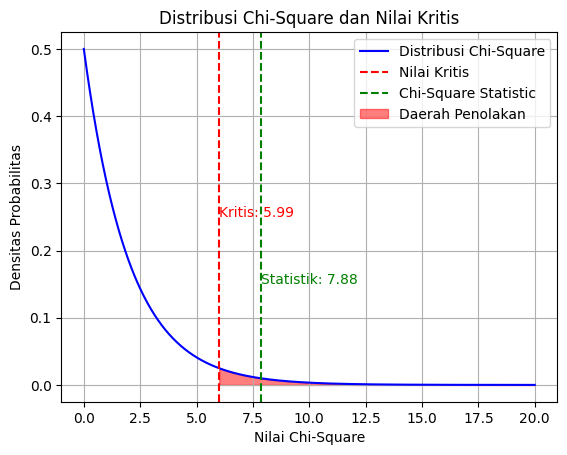

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency, chi2

# Membuat data kontingensi
data = np.array([[182, 213, 203],
                 [154, 138, 110]])

df = pd.DataFrame(data, columns=['Low', 'Medium', 'High'], index=['For', 'Against'])
print("Tabel Kontingensi Observasi:")
print(df)
print("--")

# Melakukan Uji Chi-Square
alpha = 0.05
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Nilai Ekspektasi (Expected values)
expected_df = pd.DataFrame(expected, columns=['Low', 'Medium', 'High'], index=['For', 'Against'])
print("Tabel Nilai Ekspektasi (Expected values):")
print(expected_df)
print("--")

# Menampilkan tabel Observed dan Expected values
observed_expected_df = pd.DataFrame(data, columns=['Low', 'Medium', 'High'], index=['For', 'Against'])
observed_expected_str = observed_expected_df.astype(str) + ' (' + expected_df.round(1).astype(str) + ')'
print("Tabel Observed dan Expected Values:")
print(observed_expected_str)
print("--")

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Critical Value
critical_value = stats.chi2.ppf(1 - alpha, dof)
print(f"Critical value: {critical_value}")
print("--")

# Kesimpulan
if chi2_stat > critical_value:
    print("Keputusan: Tolak H0, Tax Reform dan tingkat penghasilan saling mempengaruhi.")
else:
    print("Keputusan: Gagal menolak H0, tidak ada bukti yang cukup untuk menyatakan adanya hubungan antara Tax Reform dan tingkat penghasilan.")

# Visualisasi distribusi chi-square
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, dof)

# Plot distribusi chi-square
plt.plot(x, y, label='Distribusi Chi-Square', color='blue')

# Menghitung dan menandai nilai kritis
plt.axvline(x=critical_value, color='red', linestyle='--', label='Nilai Kritis')

# Menambahkan garis untuk statistik chi-square
plt.axvline(x=chi2_stat, color='green', linestyle='--', label='Chi-Square Statistic')

# Mengarsir daerah penolakan
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5, label='Daerah Penolakan')

plt.text(critical_value, max(y) * 0.5, f'Kritis: {critical_value:.2f}', color='red')
plt.text(chi2_stat, max(y) * 0.3, f'Statistik: {chi2_stat:.2f}', color='green')  # Menambahkan teks untuk statistik chi-square
plt.title('Distribusi Chi-Square dan Nilai Kritis')
plt.xlabel('Nilai Chi-Square')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.grid()
plt.show()

Kasus: Analisis Kepuasan Pelanggan Berdasarkan Status Pekerjaan

Perusahaan ABC ingin memahami bagaimana status pekerjaan pelanggan mempengaruhi tingkat kepuasan mereka terhadap produk dan layanan yang ditawarkan. Untuk itu, perusahaan melakukan survei kepada pelanggan yang dibagi menjadi dua kelompok berdasarkan status pekerjaan: "Bekerja" dan "Tidak Bekerja".

Hasil survei menunjukkan frekuensi kepuasan pelanggan dalam tiga kategori: "Sangat Puas", "Puas", dan "Tidak Puas". Tabel kontingensi berikut merangkum hasil survei:

In [ ]:
Tabel Kontingensi Observasi:
               Sangat Puas  Puas  Tidak Puas
Bekerja                 30    40          10
Tidak Bekerja           25    35          10

Tabel Kontingensi Observasi:
               Sangat Puas  Puas  Tidak Puas
Bekerja                 30    40          10
Tidak Bekerja           25    35          10
--
Chi-Square Statistic: 0.12175324675324671
P-value: 0.9409393225313295
Degrees of Freedom: 2
--
Tabel Nilai Ekspektasi (Expected values):
               Sangat Puas  Puas  Tidak Puas
Bekerja          29.333333  40.0   10.666667
Tidak Bekerja    25.666667  35.0    9.333333
--
Tabel Observed dan Expected Values:
              Sangat Puas       Puas Tidak Puas
Bekerja         30 (29.3)  40 (40.0)  10 (10.7)
Tidak Bekerja   25 (25.7)  35 (35.0)   10 (9.3)
--
Gagal menolak H0: Tidak ada pengaruh antara status pekerjaan dan tingkat kepuasan pelanggan.


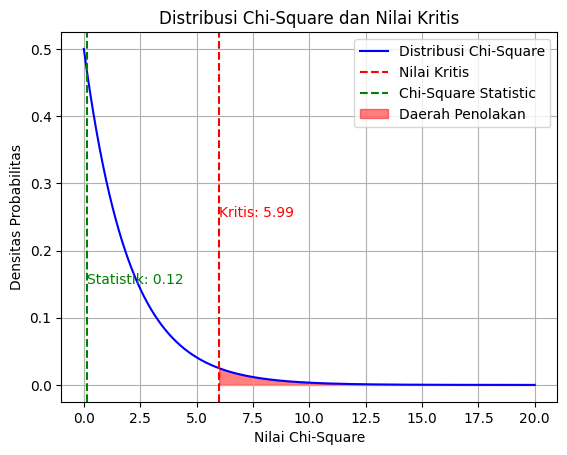

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2, chi2_contingency
import matplotlib.pyplot as plt

# Membuat data kontingensi
data = np.array([[30, 40, 10],
                 [25, 35, 10]])

df = pd.DataFrame(data, columns=['Sangat Puas', 'Puas', 'Tidak Puas'], index=['Bekerja', 'Tidak Bekerja'])
print("Tabel Kontingensi Observasi:")
print(df)
print("--")

# Melakukan Uji Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(data)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("--")

# Nilai Ekspektasi (Expected values)
expected_df = pd.DataFrame(expected, columns=['Sangat Puas', 'Puas', 'Tidak Puas'], index=['Bekerja', 'Tidak Bekerja'])
print("Tabel Nilai Ekspektasi (Expected values):")
print(expected_df)
print("--")

# Menampilkan tabel Observed dan Expected values
observed_expected_df = pd.DataFrame(data, columns=['Sangat Puas', 'Puas', 'Tidak Puas'], index=['Bekerja', 'Tidak Bekerja'])
observed_expected_str = observed_expected_df.astype(str) + ' (' + expected_df.round(1).astype(str) + ')'
print("Tabel Observed dan Expected Values:")
print(observed_expected_str)
print("--")

# Kesimpulan
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Status pekerjaan dan tingkat kepuasan pelanggan saling mempengaruhi (ada dependensi antara status pekerjaan dan tingkat kepuasan).")
else:
    print("Gagal menolak H0: Tidak ada pengaruh antara status pekerjaan dan tingkat kepuasan pelanggan.")

# Visualisasi distribusi chi-square
x = np.linspace(0, 20, 1000)  # Rentang nilai untuk distribusi chi-square
y = chi2.pdf(x, dof)  # Fungsi densitas probabilitas

# Plot distribusi chi-square
plt.plot(x, y, label='Distribusi Chi-Square', color='blue')

# Menghitung dan menandai nilai kritis
critical_value = chi2.ppf(1 - alpha, dof)  # Nilai kritis
plt.axvline(x=critical_value, color='red', linestyle='--', label='Nilai Kritis')

# Menambahkan garis untuk statistik chi-square
plt.axvline(x=chi2_stat, color='green', linestyle='--', label='Chi-Square Statistic')  # Menambahkan garis untuk statistik chi-square

# Mengarsir daerah penolakan
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5, label='Daerah Penolakan')

# Menambahkan teks untuk nilai kritis
plt.text(critical_value, max(y) * 0.5, f'Kritis: {critical_value:.2f}', color='red')

# Menambahkan teks untuk statistik chi-square
plt.text(chi2_stat, max(y) * 0.3, f'Statistik: {chi2_stat:.2f}', color='green')  # Menambahkan teks untuk statistik chi-square

# Menambahkan label dan judul
plt.title('Distribusi Chi-Square dan Nilai Kritis')
plt.xlabel('Nilai Chi-Square')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.grid()
plt.show()